In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/EE461P_Project/Data.csv")
# dataset.head(5)

In [0]:
# Data from Dataframe
X = df.drop(['genre'], axis=1)
y = df['genre']

# Scaling X Data
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

# Encoding Y Data to integer from 0-9
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

#Performing LDA
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y_enc)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.25, random_state=42)
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y_enc, test_size=0.25, random_state=42)

# User for iterations below
dataset = []
dataset.append([x_train, x_test, y_train, y_test])
dataset.append([x_train_lda, x_test_lda, y_train_lda, y_test_lda])
xtrain, xtest, ytrain, ytest = range(0,4)

# x_train.shape

In [36]:
# First Model: LogisticRegression:
lr_accuracy = []
for data in dataset:
  lr = LogisticRegression(max_iter=1500, random_state=42)
  lr.fit(data[xtrain], data[ytrain])
  lr_accuracy.append(accuracy_score(data[ytest], lr.predict(data[xtest])))

print('LogisticRegression         : {0:.3f}'.format(lr_accuracy[0]))
print('LogisticRegression with LDA: {0:.3f}'.format(lr_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(lr_accuracy[1]-lr_accuracy[0], (lr_accuracy[1]/lr_accuracy[0])-1))

RandomForestClassifier         : 0.776
RandomForestClassifier with LDA: 0.864
LDA resulted in a 0.088 point increase (11.34%).


In [35]:
# Second Model: RandomForestClassifier
rfc_accuracy = []
for data in dataset:
  rfc = RandomForestClassifier(random_state=42)
  rfc.fit(data[xtrain], data[ytrain])
  rfc_accuracy.append(accuracy_score(data[ytest], rfc.predict(data[xtest])))

print('RandomForestClassifier         : {0:.3f}'.format(rfc_accuracy[0]))
print('RandomForestClassifier with LDA: {0:.3f}'.format(rfc_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(rfc_accuracy[1]-rfc_accuracy[0], (rfc_accuracy[1]/rfc_accuracy[0])-1))

RandomForestClassifier         : 0.724
RandomForestClassifier with LDA: 0.852
LDA resulted in a 0.128 point increase (17.68%).


In [41]:
# Third Model: NaiveBayes
gnb_accuracy = []
for data in dataset:
  gnb = GaussianNB()
  gnb.fit(data[xtrain], data[ytrain])
  gnb_accuracy.append(accuracy_score(data[ytest], gnb.predict(data[xtest])))

print('NaiveBayes         : {0:.3f}'.format(gnb_accuracy[0]))
print('NaiveBayes with LDA: {0:.3f}'.format(gnb_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(gnb_accuracy[1]-gnb_accuracy[0], (gnb_accuracy[1]/gnb_accuracy[0])-1))

NaiveBayes         : 0.552
NaiveBayes with LDA: 0.880
LDA resulted in a 0.328 point increase (59.42%).


In [31]:
# Fourth Model: SGDClassifier
sgd_accuracy = []
for data in dataset:
  sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=2000, random_state=42)
  sgd.fit(data[xtrain], data[ytrain])
  sgd_accuracy.append(accuracy_score(data[ytest], sgd.predict(data[xtest])))

print('SGDClassifier         : {0:.3f}'.format(sgd_accuracy[0]))
print('SGDClassifier with LDA: {0:.3f}'.format(sgd_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(sgd_accuracy[1]-sgd_accuracy[0], (sgd_accuracy[1]/sgd_accuracy[0])-1))

SGDClassifier         : 0.728
SGDClassifier with LDA: 0.808
LDA resulted in a 0.080 point increase (10.99%).


In [52]:
# Final Model: TerasSequential
epochs = 20
batch_size = 64 # On average the best

seq_history = []
seq_accuracy = []
for data in dataset:
  seq = Sequential()
  seq.add(Dense(512, activation='relu', input_shape=(data[xtrain].shape[1],)))
  seq.add(Dense(256, activation='relu'))
  seq.add(Dense(128, activation='relu'))
  seq.add(Dense(64, activation='relu'))
  seq.add(Dense(10, activation='softmax'))

  seq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = seq.fit(data[xtrain], data[ytrain], epochs=epochs, batch_size=batch_size, validation_data=(data[xtest], data[ytest]), verbose=0)
  seq_history.append(history)
  test_loss, test_acc = seq.evaluate(data[xtest], data[ytest], verbose=0)
  seq_accuracy.append(test_acc)
  # print(accuracy_score(data[ytest], seq.pre(data[xtest])))

print('TerasSequential         : {0:.3f} (~0.74-0.77 on average)'.format(seq_accuracy[0]))
print('TerasSequential with LDA: {0:.3f} (~0.84-0.87 on average)'.format(seq_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}) (~7-17% on average)'.format(seq_accuracy[1]-seq_accuracy[0], (seq_accuracy[1]/seq_accuracy[0])-1))


ValueError: ignored

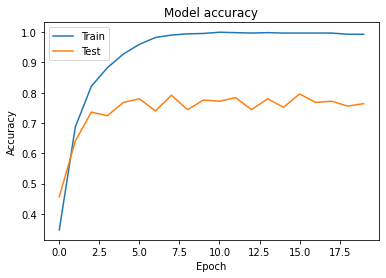

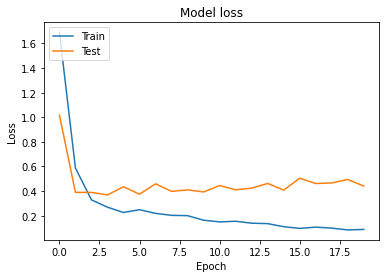

In [40]:

# Plot training & validation accuracy values
plt.plot(seq_history[0].history['accuracy'])
plt.plot(seq_history[0].history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(seq_history[0].history['loss'])
plt.plot(seq_history[0].history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Use this to print class based accuracies, i.e how successful a model ranks classical music

def model_class_ranking_success(model, isSequential, useLDA):
  print('Class Based Test Accuracies:')
  accuracy_list = []
  for index, genre in enumerate(np.unique(encoder.inverse_transform(y_enc))):
    start_index = index * 100
    end_index = (index+1) * 100
    x_genre = x_lda[start_index:end_index] if useLDA else x_scaled[start_index:end_index]
    y_genre = y_enc[start_index:end_index]
    
    if isSequential:
      test_loss, test_acc = model.evaluate(x_genre, y_genre, verbose=0)
      accuracy_list.append((genre.title(), test_acc))
    else:
      accuracy_list.append((genre.title(), accuracy_score(y_genre, model.predict(x_genre))))

  accuracy_list = sorted(accuracy_list, key=lambda x: x[1], reverse=True)
  for genre, test_acc in accuracy_list:
    print('{0:9}: {1:.3f}'.format(genre.title(), test_acc))


In [71]:
lr = LogisticRegression(max_iter=1500, random_state=42)
lr.fit(dataset[0][xtrain], dataset[0][ytrain])
model_class_ranking_success(lr, False, False)

Class Based Test Accuracies:
[('Blues', 0.97), ('Classical', 1.0), ('Country', 0.92), ('Disco', 0.89), ('Hiphop', 0.95), ('Jazz', 0.96), ('Metal', 0.96), ('Pop', 0.97), ('Reggae', 0.9), ('Rock', 0.89)]
Classical: 1.000
Blues    : 0.970
Pop      : 0.970
Jazz     : 0.960
Metal    : 0.960
Hiphop   : 0.950
Country  : 0.920
Reggae   : 0.900
Disco    : 0.890
Rock     : 0.890
